## Week 6-2: Bayesian methods


#### Last time
* Introduction to Bayesianism

#### Today
* Choosing priors
* Markov chain Monte Carlo (MCMC)

#### Reference
* (__TBC__) Robert, C. P. (1994). The Bayesian Choice. 2nd Edition. _Springer Text in Statistics_.
* Christophe Andrieu, Arnaud Doucet, and Roman Holenstein (2010). Particle Markov chain Monte Carlo methods. _JRSSB_ 72: 269--342
* Pierre Jacob, O’Leary, and Atchadé (2020). Unbiased Markov chain Monte Carlo methods withcouplings. _JRSSB_ 82:543--600
* pymc-learn: https://pymc-learn.readthedocs.io/en/latest/
* PyStan: https://pystan.readthedocs.io/en/latest/index.html
* Stan: https://mc-stan.org/

Bayesian machine learning is a paradigm for constructing statistical models based on Bayes’ Theorem.

_Bayes' theorem_
$$
\pi(\theta | x) = \frac{f(x | \theta) \pi(\theta)}{\int f(x | \theta) \pi(\theta) d\theta}
$$

- $\pi(\theta|x)$: posterior distribution
- $f(x | \theta)$: likelihood function
- $\pi(\theta)$: prior distribution

### Priors - parametric world

Specifying a prior is the key for conducting Bayesian analysis. It is also the part that has been challenged by frequentism.  


#### 1. Conjugate priors

Conjugate priors are commonly used in Bayesian analysis. 

_Example:_

Suppose the observations $x_1, \dots, x_n$ are i.i.d normal $N(\theta, 1)$ with unknown mean $\theta$ and a known variance 1. The normal prior for $\theta$ $\pi(\theta) = N(\mu, \sigma^2)$ is a conjugate prior.

$$
\pi(\theta | x_1, \dots, x_n) = \frac{\prod_{i=1}^n f(x_i | \theta) \pi(\theta)}{\int \prod_{i=1}^n f(x_i | \theta) \pi(\theta) d\theta} = N\Big(\frac{\mu/\sigma^2 + \sum_{i=1}^n x_i}{n + 1/\sigma^2}, \frac{1}{n + 1/\sigma^2} \Big).
$$

__Definition (P114 of TBC)__: A family $\mathcal{F}$ of probability distributions on $\Theta$ is said to be conjugate for a likelihood function $f(x|\theta)$ if, for every $\pi \in \mathcal{F}$, the posterior distribution $\pi(\theta | x) \in \mathcal{F}$.


_Advantage_: Convenient. They often lead to a closed form for the posterior, which can be easily used for computation. 
As conjugate family is typically parametrized, then conjugacy reduces to parameter updating.

_Criticisms_: often unrealistic. Not necessarily the most robust prior distributions comparing to noninformative priors


Examples of conjugate priors (from TBC)
<img src="conjugate.png" width=50%>

See more on [Wikipedia](https://en.wikipedia.org/wiki/Conjugate_prior)

#### 2. Noninformative priors

Often, a real prior is hard to obtain, the strategy is to choose a prior so called the non-informative prior such that it will influences the posterior as little as possible.

``Laplace's prior``

The first noninformative prior proposed by Laplace is to choose a uniform prior for the value of parameter. What about $\theta \in \mathbb{R}$? Often one assigns the prior $\pi(\theta) \propto 1$. This prior is improper which can be viewed as the limit of $\text{Unif}(-N, N)$ as $N \to \infty$. 

_Example:_

Consider the prior for $\pi(\theta) \propto 1$ in the previous example, we obtain the posterior 
$$
\pi(\theta | x_1, \dots, x_n) = N\Big(\frac{\sum_{i=1}^n x_i}{n}, \frac{1}{n}\Big).
$$

_Criticism_: The prior is not invariance under reparameterization. If we switch from $\theta$ to $\eta = g(\theta)$, if $\pi(\theta) = 1$, the corresponding prior for $\pi(\eta) = |d g^{-1}(\eta) / d\eta|$, in general, is not constant.

``The Jeffreys prior``

The Jefferys noninformative prior is based on the Fisher information matrix given by 
$$
I(\theta) = - \mathbb{E}_\theta \Big(\frac{\partial^2 \log f(X|\theta)}{\partial \theta^2}\Big)
$$
The prior is chosen as $\pi(\theta) \propto \sqrt{I(\theta)}$.

This prior is invariant because $I(\theta) = I(g(\theta))(g'(\theta))^2$.

``Other priors``: Reference priors, Haar prior (see Ch 3 of TBC)

#### 3. 'Elicitation from experts' priors

Choose the prior distribution through combining opinions form experts to obtain a valide subjective priors (e.g., Albert et al, 2012).

A quick comment: Different priors can lead to quite different results when sample size is small, but when the sample size increases, most of them will agree (really? --> nonparametric Bayes).

There is a large literature on frequentist analysis of Bayesian posteriors (e.g., van der Vaart (1998) Ch.10 of _Asymptotic Statistics_). Its goal is to study the limiting behavior of a Bayesian procedure as $n \to \infty$. Surprisingly, by choosing suitable priors, one can show that a Bayesian estimator is consistent (often converges the same limit as some frequentist estimators (e.g., MLE in parametric regular models) and the size of a credible interval matches with the corresponding confidence interval (due to the so called _Bernstein-von phenomenon_). 

### Hierarchical Bayes and empirical Bayes

``Bayesian hierarchical modelling``

Suppose $y_1, \dots, y_n$ are the observations and one wishes to estimate $\theta$. But there is another parameter $\phi$ which is unknown, the Bayesian hierarchical model contains the following stages:

1. Likelihood function: $y_{j} | \theta,\phi \sim f(y_{j} | \theta,\phi)$
2. $\theta | \phi \sim \pi(\theta | \phi )$
3. $\phi | \pi(\phi)$

_Example:_ In the previous example, suppose $x_i \sim N(\theta, \sigma^2)$ and both $\theta$ and $\sigma^2$ are unknown, consider the following prior:

$$
\pi(\theta | \sigma^2) = N(\mu, \sigma^2), \quad \pi(\sigma^{-2}) = \text{Gamma}(a, b).
$$

``Empirical Bayes``

The Empirical Bayes (EB) approach can be seen as an approximation to a fully Bayesian treatment of hierarchical Bayes.

The first major work on EB is by Robbins (1955) (see [here](https://link.springer.com/chapter/10.1007/978-1-4612-0919-5_25)) and advocated by Bradley Efron in 1970s.

The EB approach uses data twice. First, it uses data to estimate the prior (often the hyperparameter $\phi$). Next, it construct the prior for $\theta$ given by $\pi(\theta|\hat \phi)$. 


### Bayesian point estimation

Similar to how to obtain the maximum likelihood estimator, one can obtain a Bayesian point estimator by maximizing the posterior distribution, 
$$
\hat \theta \rightarrow arg\max_\theta \pi(\theta | x).
$$
It is equivalent to solve 
$$
\hat \theta \rightarrow arg\max_\theta \log \pi(\theta | x) = arg\max_\theta (\log f(x|\theta) + \log \pi(\theta)).
$$
The estimator is known as the maximum of a posteriori (MAP) estimator, and it equals to the mode of the posterior distribution.

_Example:_

Consider $Y \sim N(X\beta, \sigma^2 I_n)$, suppose $\sigma^2 = 1$ is known. Consider the prior $\pi(\beta) = N(0,  I_p/\lambda)$, then the MAP estimator 
$$
\hat \beta = arg\min_\beta \Big(\|y - X\beta\|^2 + \lambda \|\beta\|^2\Big)
$$
Indeed, there is a connection between the Bayesian method and ridge regression. Similar to lasso, one then choose the prior $\pi(\beta_j) = \text{Laplace}(0, \lambda)$ for $j = 1, \dots, p$.

Now let's take a look at the posterior, by calculation, we got
$$
\pi(\beta | Y, X) = N\big((X'X + \lambda I_p)^{-1} X'y, (X'X + \lambda I_p)^{-1}\big).
$$
If choosing $\lambda$ to be large, the mean is penalized, but the largest eigenvalue of the covariance matrix also get penalized. 

### Monte Carlo simulation

Often one needs to evaluate the integral like
$$
{I}(x) = \int_{\theta \in \Theta} f(\theta) \pi(\theta|x) d\theta
$$
For example, if $f(\theta) = \theta$, then ${I}(x)$ is the posterior mean. 

Suppose $\pi(\theta | x) = N(\bar X, 1)$ and $\bar X = 1$, then the posterior mean is 1. One can also estimate the posterior mean through Monte Carlo (MC) simulation: draw $N$ values of $\theta$ independently from $\pi(1, 1)$, we denote those draws as $(\theta_1, \dots, \theta_N)$, then the posterior mean is the average value of those draws. When $N$ is large, this average value should close to 1. 

In general, one can approximate $\hat{{I}}_1(x) = \frac{1}{N} \sum_{i=1}^N f(\theta_i)$, $\theta_i \sim \pi(\theta|x)$.

In [7]:
import numpy as np
np.random.seed(2022)
N = 10
draws = np.random.normal(1,1,N)
mean = np.mean(draws)
print(mean)

1.4205478811800978


In [8]:
# increase N
N = 10000
draws = np.random.normal(1,1,N)
mean = np.mean(draws)
print(mean)

1.0014750239695598


Of course, the above example is too simple. One does not need to estimate the normal mean through MC simulation. If drawing samples from $\pi(\theta | x)$ is difficult, let $q(\theta)$ be another density for $\theta$ which has the same support of $\pi$, then since
$$
{I}(x) = \int_{\theta \in \Theta} \frac{f(\theta) \pi(\theta|x)}{q(\theta)} q(\theta) d\theta,
$$
one can draw samples from $q(\theta)$ and then calculate
$$
\hat{{I}}_2(x) = \frac{1}{N}\sum_{i=1}^N \frac{f(\theta_j) \pi(\theta_j|x)}{q(\theta_j)}
$$

Both $\hat{{I}}_1(x)$ and $\hat{{I}}_2(x)$ are method of moments estimators of ${I}(x)$, they  1) are unbiased esitmators; 2) enjoy central limit theorem $\sqrt{n} (\hat I_k(x) - I(x))/\sigma_k \to N(0, 1)$, where $\sigma_1^2 = \int f^2(\theta) \pi(\theta|x) d\theta - I^2$ and $\sigma_2^2 = \int f^2(\theta) \pi^2(\theta|x) / q(\theta) d\theta - I^2$

### Markov chain Monte Carlo

        There is an algorithm which is powerful, easy to implement, and so versatile it warrants the label 
        “universal.” It is flexible enough to solve otherwise intractable problems in physics, applied 
        mathematics, computer science, and statistics. It works in both probabilistic and deterministic 
        situations. Best of all, because it was inspired by Nature, it is blessed with extreme elegance.
        
        - Matthew Richey (The Evolution of Markov Chain Monte Carlo Methods, The American Mathematical Monthly)




Markov chain Monte Carlo (MCMC) algorithm is an algorithm to approximate a posterior distribution when this sample cannot be directly simulated. 

MCMC provides acceptable approximations to integrals and other functionals depending on a distribution of interest through generating a _Markov Chain_ with limiting distribution the distribution of interest. 

We consider the _Markov Chain_ to be ``irreducible``, meaning that every state can be reached from every other state (possibly in several steps), and ``ergodic``, meaning that it is possible to go from every state to every state. 
[Reference](https://webee.technion.ac.il/people/shimkin/MC15/MC15lect6-MCMC.pdf)

### Gibbs sampling

<img src="gibbs.jpg" width=40%>
                                      
                                      Josiah Willard Gibbs' tomb at Yale University



Suppose we want to simulate $\alpha, \beta, \gamma$ from their joint posterior distribution $\pi(\alpha, \beta, \gamma | x)$. Suppose it is "easy" to simulate from their conditional distributions $\pi(\alpha | \beta, \gamma, x)$, 
$\pi(\beta | \alpha, \gamma, x)$, $\pi(\gamma | \alpha, \beta, x)$, then the Gibbs sampling follows:

- Step 0: Start with initial values $\alpha^{(0)}$, $\beta^{(0)}$, and $\gamma^{(0)}$
- Step 1 to Step T: repeat ($t = 1, \dots, T$)
    - draw $\alpha^{(t)}$ from $\pi(\alpha | \beta^{(t-1)}, \gamma^{(t-1)}, x)$
    - draw $\beta^{(t)}$ from $\pi(\beta | \alpha^{(t)}, \gamma^{(t-1)}, x)$
    - draw $\gamma^{(t)}$ from $\pi(\gamma | \alpha^{(t)}, \beta^{(t)}, x)$
- Stop when $T$ is large enough    


_Example 1:_ Consider the model $x_i \sim N(\mu, \sigma^2)$, $i=1,\dots,n$ and $x_i$ are i.i.d., both $\mu$ and $\sigma^2$ are unknown. Priors are $\mu|\sigma^2 \sim N(0, \sigma^2)$ and $\sigma^{-2} \sim Gamma(1, 1)$, then the conditional posterior distribution are 

- $\pi(\mu | \sigma^2, x^n) = N(\sum_{i=1}^n x_i/(n+1), \sigma^2/(n+1))$
- $\pi(\sigma^{-2} | \mu, x^n) = Gamma(n/2+1, \sum_{i=1}^n (x_i - \mu)^2/2 + 1)$



In [222]:
import numpy as np
np.random.seed(2022)

# generate the dataset
N = 50
mu_true = 1
sigsq_true = 2
x = np.random.normal(mu_true, np.sqrt(sigsq_true), N)

In [223]:
# run gibbs sampling
T = 5000 # total iterations
mu0 = 5 # initial values
sigsq0 = 10

mu_draws = sigsq_draws = [] # create empty arrays for collecting draws
for t in range(T) :
    if t == 0:
        mu = mu0
    
    sigsq = 1/np.random.gamma(N/2 + 1, 1/(sum((x - mu)**2)/2 + 1), 1) 
        # draw sigma from its conditional posterior dist.
    mu = np.random.normal(sum(x)/(N+1), sigsq/(N+1), 1) 
        # draw mu from its conditional posterior dist.
    mu_draws = np.append(mu_draws, mu) # collect draws
    sigsq_draws = np.append(sigsq_draws, sigsq)

#### Convergence diagnose for $\mu$

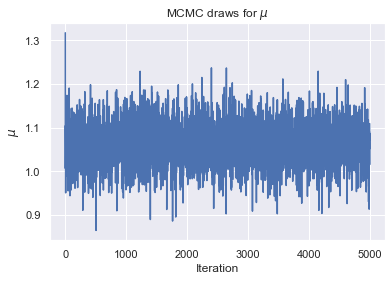

In [224]:
from matplotlib import pyplot as plt

plt.title("MCMC draws for $\mu$") 
plt.xlabel("Iteration") 
plt.ylabel("$\mu$")
plt.plot(mu_draws)


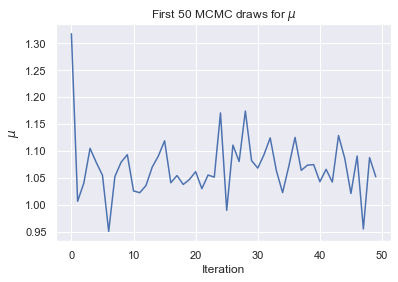

In [225]:
# take closer look at the first 50 draws
from matplotlib import pyplot as plt

plt.title("First 50 MCMC draws for $\mu$") 
plt.xlabel("Iteration") 
plt.ylabel("$\mu$")
plt.plot(mu_draws[range(50)])

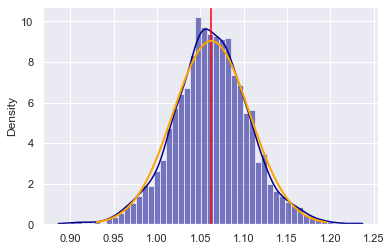

In [226]:
# histogram and density plot of draws

import seaborn as sns
import scipy.stats as stats
sns.set_theme(style="darkgrid")

burnin = int(T * 0.2)
mu_draws_mean = np.mean(mu_draws[burnin:T])
sns.histplot(mu_draws[burnin:T], kde=True, stat = "density", color = 'darkblue')
plt.axvline(mu_draws_mean, color = "red")

# add theoretical normal density
norm_mean = mu_draws_mean
norm_std = np.std(mu_draws[burnin:T])
points = np.linspace(norm_mean - 3*norm_std, norm_mean + 3*norm_std, 100)
plt.plot(points, stats.norm.pdf(points, norm_mean, norm_std), color = "orange", linewidth = 2)

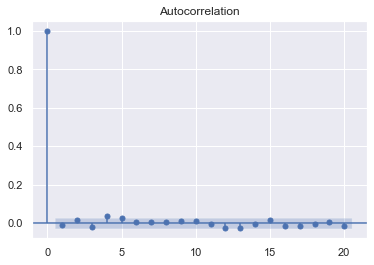

In [228]:
# plot autocorrelation function 
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(mu_draws[:], lags=20); # add ; otherwise, give two plots

#### Convergence diagnose for $\sigma$

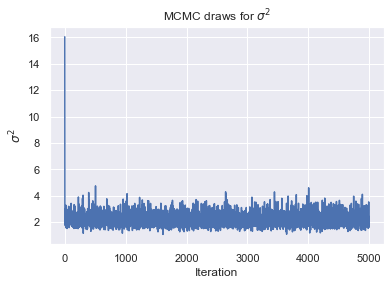

In [229]:
from matplotlib import pyplot as plt

plt.title("MCMC draws for $\sigma^2$") 
plt.xlabel("Iteration") 
plt.ylabel("$\sigma^2$")
plt.plot(sigsq_draws)


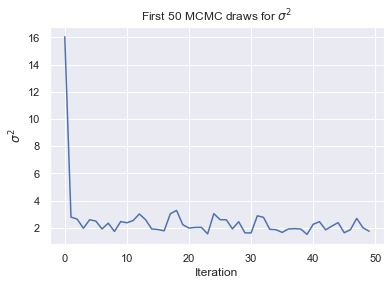

In [230]:
# take a look at the first 50 draws
from matplotlib import pyplot as plt

plt.title("First 50 MCMC draws for $\sigma^2$") 
plt.xlabel("Iteration") 
plt.ylabel("$\sigma^2$")
plt.plot(sigsq_draws[range(50)])


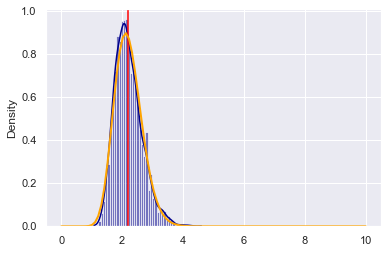

In [232]:
# histogram and density plot of draws

import seaborn as sns
import scipy.stats as stats 
sns.set_theme(style="darkgrid")

burnin = int(T * 0.2)
sigsq_draws_mean = np.mean(sigsq_draws[burnin:T])
sns.histplot(sigsq_draws[burnin:T], stat = "density", kde=True, color = 'darkblue')
plt.axvline(sigsq_draws_mean, color = "red")


# add theoretical gamma density
gamma_mean = np.mean(sigsq_draws[burnin:T])
gamma_var = np.var(sigsq_draws[burnin:T])
gamma_scale = gamma_var / gamma_mean # get scale para
gamma_shape = gamma_mean / gamma_scale # get shape para

# points = (np.linspace(gamma_mean+0.0001, 15, 100) - gamma_mean)/gamma_scale
# plt.plot(points, gamma.pdf(points, gamma_shape), color = "orange", linewidth = 2)

points = np.linspace(0.0001, 10, 100)
plt.plot(points, stats.gamma.pdf(points, a = gamma_shape, scale = gamma_scale), color = "orange", linewidth = 2)

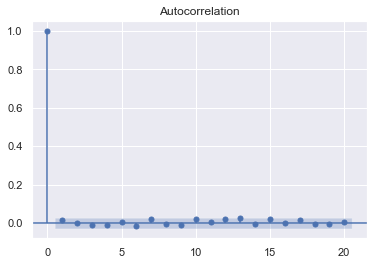

In [233]:
# plot autocorrelation function 
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sigsq_draws[:], lags=20); # add ; otherwise, give two plots

_Q: How to obtain the credible intervals for $\theta$ and $\sigma^2$?_

### Metroplis-Hastings


What if simulating from the conditional posterior distribution is not easy. For example, my client strongly believe the prior of $\theta$ should be a Laplace density (not normal). Thus, the prior is no longer conjugate with the likelihood function. (We will see that a Laplace density is used for Bayesian high-dimensional analysis in the next lecture.) One can use the Metropolis-Hastings algorithm. 

The M-H algorithm first random draw a sample from a proposal density, say $\theta^\star \sim q(\theta| \theta^{(t)})$, then compute the acceptance probability: 
$$
\alpha(\theta^\star, \theta^{(t)}) = \frac{\pi(\theta^\star) q(\theta^{(t)}|\theta^\star)}{\pi(\theta^{(t)}) q(\theta^\star|\theta^{(t)})}
$$

- Let $\theta^{(t+1)} = \theta^\star$ with probability $\rho = \min\{\alpha(\theta^\star, \theta^{(t)}), 1\}$
- Let $\theta^{(t+1)} = \theta^{(t)}$ with probability $1-\rho$

In practice, draw $u \sim \text{Uniform}(0, 1)$:
- if $u \leq \rho$, $\theta^{(t+1)} = \theta^\star$
- if $u > \rho$, $\theta^{(t+1)} = \theta^{(t)}$


_Example:_ Consider the model $x_i \sim N(\mu, \sigma^2)$, $i=1,\dots,n$ and $x_i$ are i.i.d., both $\mu$ and $\sigma^2$ are unknown. Priors are $\mu \sim \text{Laplace}(0, 1)$ and $\sigma^{-2} \sim \text{Gamma}(1, 1)$, then the conditional posterior distribution are 

- $\pi(\mu | \sigma^2, x^n) \propto \prod_{i=1}^n N(x_i | \mu, \sigma^2) \times \text{Laplace}(0, 1)$
- $\pi(\sigma^2 | \mu, x^n) = N(n/2+1, \sum_{i=1}^n (x_i - \mu)^2/2 + 1)$

We choose the proposal density for $\mu \sim N(\mu^{(t)}, 1)$, centered at the previous draw of $\mu^{(t)}$, then $N(\mu | \mu^{(t)}, 1) = N(\mu^{(t)} | \mu, 1)$, thus the acceptance probability simply becomes 
$$
\alpha(\mu, \mu^{(t)}) = \frac{\pi(\mu| \sigma^2, x^n)}{\pi(\mu^{(t)} | \sigma^2, x^n)}
= \exp\Big( 
\log \pi(\mu| \sigma^2, x^n) - \log \pi(\mu^{(t)} | \sigma^2, x^n)
\Big)
$$

By plugging-in the expression of $\pi(\mu | \sigma^2, x^n)$, we obtain 
\begin{align}
\log \pi(\mu| \sigma^2, x^n) - \log \pi(\mu^{(t)} | \sigma^2, x^n)
& = - \frac{\sum_{i=1}^n (x_i - \mu)^2 - \sum_{i=1}^n (x_i - \mu^{(t)})^2}{2\sigma^2} - |\mu| + |\mu^{(t)}|\\
& = - \frac{n \mu^2 - n \big(\mu^{(t)}\big)^2 - 2\sum_{i=1}^n x_i(\mu - \mu^{(t)})}{2\sigma^2} - |\mu| + |\mu^{(t)}|
\end{align}

We still choose $\sigma^{-2} \sim \text{Gamma}(1, 1)$, so the conditional posterior distribution of $\sigma^2$ given $\mu, x^n$ stays the same

In [279]:
# run gibbs sampling
T = 5000 # total iterations
mu0 = 5 # initial values
sigsq0 = 2
accpt_count = 0 # count number of accepted draws

mu_draws = sigsq_draws = [] # create empty arrays for collecting draws
for t in range(T) :
    if t == 0:
        mu = mu0
    
    sigsq = 1/np.random.gamma(N/2 + 1, 1/(sum((x - mu)**2)/2 + 1), 1) 
        # draw sigma from its conditional posterior dist.
    mu_prop = np.random.normal(mu, 0.2)
    neg_log_alpha = (N*(mu_prop**2 - mu**2) - 2*sum(x)*(mu_prop - mu))/(2*sigsq) + abs(mu_prop) - abs(mu)
    alpha = np.exp(-neg_log_alpha)
    
    # draw u ~ Unif([0,1])
    u = np.random.uniform(0, 1)
    
    if u < alpha:
        mu = mu_prop
        accpt_count = accpt_count + 1
    else:
        mu = mu

    mu_draws = np.append(mu_draws, mu) # collect draws
    sigsq_draws = np.append(sigsq_draws, sigsq)

In [280]:
# check the number of draws accepted
# here in order to obtain a reasonable acceptance ratio, the proposal density needs to be chosen smartly. 
# A bad proposal density can lead to a small acceptance ratio. Then the algorithm will "stuck" in a certain value of 
# theta for a long period
# here, you can try to change the proposal density to $N(mu, 1)$ or $N(mu, 10)$ or $N(mu, 0.1)$. 
accpt_ratio = accpt_count/T
print(accpt_ratio)

0.7138


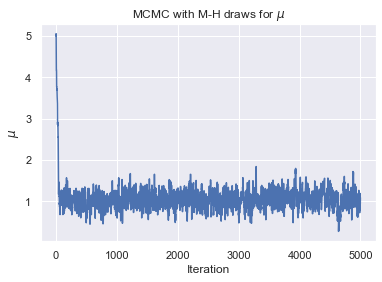

In [281]:
from matplotlib import pyplot as plt

plt.title("MCMC with M-H draws for $\mu$") 
plt.xlabel("Iteration") 
plt.ylabel("$\mu$")
plt.plot(mu_draws)

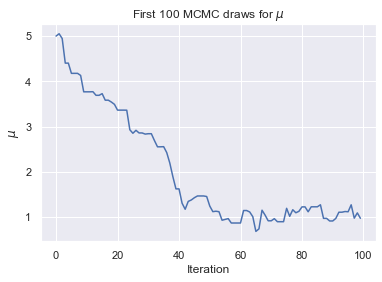

In [290]:
# take closer look at the first 50 draws
from matplotlib import pyplot as plt

plt.title("First 100 MCMC draws for $\mu$") 
plt.xlabel("Iteration") 
plt.ylabel("$\mu$")
plt.plot(mu_draws[range(100)])

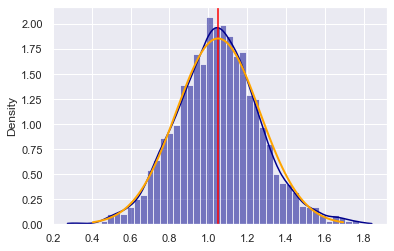

In [283]:
# histogram and density plot of draws

import seaborn as sns
import scipy.stats as stats
sns.set_theme(style="darkgrid")

burnin = int(T * 0.2)
mu_draws_mean = np.mean(mu_draws[burnin:T])
sns.histplot(mu_draws[burnin:T], kde=True, stat = "density", color = 'darkblue')
plt.axvline(mu_draws_mean, color = "red")

# add theoretical normal density
norm_mean = mu_draws_mean
norm_std = np.std(mu_draws[burnin:T])
points = np.linspace(norm_mean - 3*norm_std, norm_mean + 3*norm_std, 100)
plt.plot(points, stats.norm.pdf(points, norm_mean, norm_std), color = "orange", linewidth = 2)

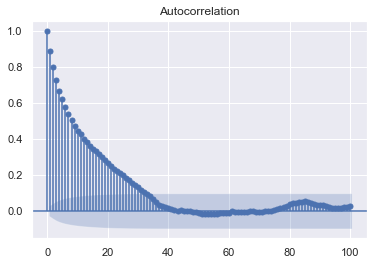

In [284]:
# plot autocorrelation function 
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(mu_draws[:], lags=100); # add ; otherwise, give two plots

#### Convergence for $\sigma^2$

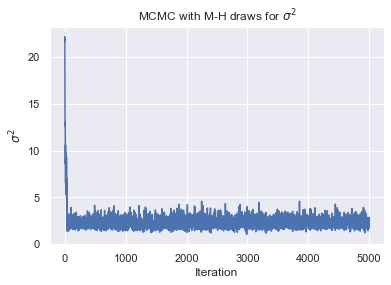

In [285]:
from matplotlib import pyplot as plt

plt.title("MCMC with M-H draws for $\sigma^2$") 
plt.xlabel("Iteration") 
plt.ylabel("$\sigma^2$")
plt.plot(sigsq_draws)


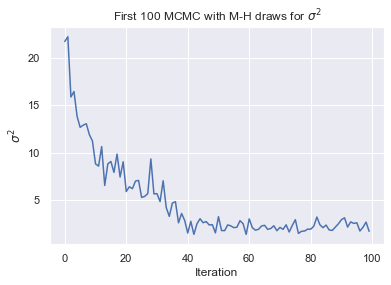

In [287]:
# take a look at the first 50 draws
from matplotlib import pyplot as plt

plt.title("First 100 MCMC with M-H draws for $\sigma^2$") 
plt.xlabel("Iteration") 
plt.ylabel("$\sigma^2$")
plt.plot(sigsq_draws[range(100)])


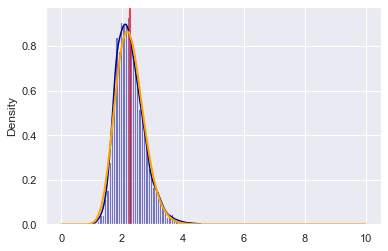

In [288]:
# histogram and density plot of draws

import seaborn as sns
import scipy.stats as stats 
sns.set_theme(style="darkgrid")

burnin = int(T * 0.2)
sigsq_draws_mean = np.mean(sigsq_draws[burnin:T])
sns.histplot(sigsq_draws[burnin:T], stat = "density", kde=True, color = 'darkblue')
plt.axvline(sigsq_draws_mean, color = "red")


# add theoretical gamma density
gamma_mean = np.mean(sigsq_draws[burnin:T])
gamma_var = np.var(sigsq_draws[burnin:T])
gamma_scale = gamma_var / gamma_mean # get scale para
gamma_shape = gamma_mean / gamma_scale # get shape para

# points = (np.linspace(gamma_mean+0.0001, 15, 100) - gamma_mean)/gamma_scale
# plt.plot(points, gamma.pdf(points, gamma_shape), color = "orange", linewidth = 2)

points = np.linspace(0.0001, 10, 100)
plt.plot(points, stats.gamma.pdf(points, a = gamma_shape, scale = gamma_scale), color = "orange", linewidth = 2)

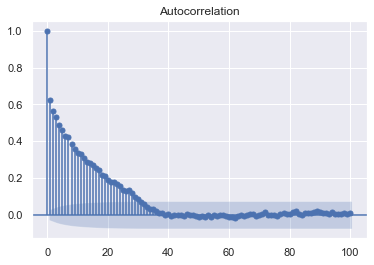

In [289]:
# plot autocorrelation function 
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sigsq_draws[:], lags=100); # add ; otherwise, give two plots

#### Comments:

1. Perhaps the biggest issue is determining how many steps to stop. In theory, the method provides consistent approximations if the number of iterative goes to infinity. In practice, we have to stop at some point. When to stop the algorithm is often problem-specific. One needs to run convergence diagnoses to check the convergence of chains. 
2. MCMC is lesser sensitive to the initial choice of parameters (compared to the other methods mentioned in this class, e.g., gradient descent). But a bad starting point can lead to a longer time to converge and a lower acceptance rate for the M-H algorithm.
3. There are many other sampling-based methods, including reversible jump mcmc, importance sampling, Hamiltonian Monte Carlo, particle MCMC (Andrieu, Doucet, and Holenstein, 2010), sequential Monte Carlo, and slice sampling. Due to time constraints, we could not cover them in the class.
4. MCMC is an iterative method, so it is difficult for parallel computing implementation. A recent work by Jacob et al. using couplings idea is very promising to conduct parallel computing for MCMC. (see Pierre Jacob, O’Leary, and Atchadé (2020); or watch [this](https://www.youtube.com/watch?v=ohu8DJ1qDb0&t=3995s))
5. [pymc-learn](https://pymc-learn.readthedocs.io/en/latest/), [Stan](https://mc-stan.org/) or [PyStan](https://pystan.readthedocs.io/en/latest/index.html) are commonly used package for running MCMC by pratitioners. 